# Avocado AveragePrice  and Region Prediction Project

Project Description:

     The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 
     Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 


In [307]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import scipy.stats as stats
from tqdm.notebook import tqdm
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier


from sklearn.svm import SVR

#importing important metrics
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV ,train_test_split, cross_val_score
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import Ridge,Lasso
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [308]:
avocado=pd.read_csv("avocado.csv")
avocado

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


This dataset has 18249 rows and 14 columns.


In [309]:
avocado.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [310]:
avocado.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


##### Column Names

In [311]:
avocado.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

As per the project description, the important columns are 

•	Date - The date of the observation
•	AveragePrice - the average price of a single avocado
•	type - conventional or organic
•	year - the year
•	Region - the city or region of the observation
•	Total Volume - Total number of avocados sold
•	4046 - Total number of avocados with PLU 4046 sold
•	4225 - Total number of avocados with PLU 4225 sold
•	4770 - Total number of avocados with PLU 4770 sold

##### Datatypes

In [312]:
avocado.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

The dataset has three categorical columns and 11 numerical columns.

In which 9 have float values, 2 have integer values and 3 have object values

In [313]:
avocado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [314]:
avocado.shape

(18249, 14)

In [315]:
avocado.shape

(18249, 14)

In [316]:
avocado.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

<Axes: >

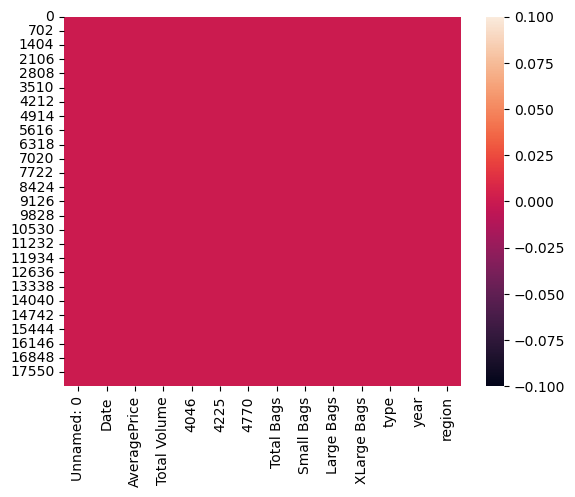

In [317]:
sns.heatmap(avocado.isnull())

This dataset doesn't have any null values.

In [318]:
avocado.duplicated().sum()

0

The dateset have any duplicate values.

In [319]:
avocado['Date']=pd.to_datetime(avocado['Date'])
avocado['Month'] = avocado['Date'].dt.month
avocado['Day'] = avocado['Date'].dt.month

In [320]:
avocado.drop(['Unnamed: 0','Date'],axis=1,inplace=True )

As 'year' column is already existed in the dataframe, we are creating new column for day and month. hence dropping out date column.

The column 'Unnamed:0' doe not impact the target variable and hence dropping out.

In [321]:
avocado.shape

(18249, 14)

In [322]:
avocado.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899,6.177215,6.177215
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938,3.534130,3.534130
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000,1.000000,1.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000,3.000000,3.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000,6.000000,6.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000,9.000000,9.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000,12.000000,12.000000


Observations:
    1. The dataset does't have any null values and hence count is same for all columns
    2. Outliers are present in the data set as theere is a differece between 75% and maximum value which needs to be removed.
    3. The avocado average price is 1.405978 and maximum price is 3.250000
    4. The most common month appears to be December based on max value.
    5. The most common day  appears to be 12th of December based on max value.
    

In [323]:
avocado.describe(include='object')

,type,region
count,18249,18249
unique,2,54
top,conventional,Albany
freq,9126,338


The conventional type is the topest with frequency 9126.

In [324]:
avocado.groupby('year')['AveragePrice'].mean()

year
2015    1.375590
2016    1.338640
2017    1.515128
2018    1.347531
Name: AveragePrice, dtype: float64

In the year 2017, the avocado average price is maximum. 

In [325]:
avocado.groupby('year')['type'].value_counts()

year  type        
2015  conventional    2808
      organic         2807
2016  conventional    2808
      organic         2808
2017  conventional    2862
      organic         2860
2018  conventional     648
      organic          648
Name: count, dtype: int64

* In 2015, 2017 the avocado type 'conventional' has maximum value 
* In the year 2016,2018 both conventional,organic type has same values.

In [326]:
avocado['region'].value_counts()

region
Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago              

Each region appears 338 times, except for "WestTexNewMexico," which appears 335 times.

## EDA Analysis

Univariate Analysis

<function matplotlib.pyplot.show(close=None, block=None)>

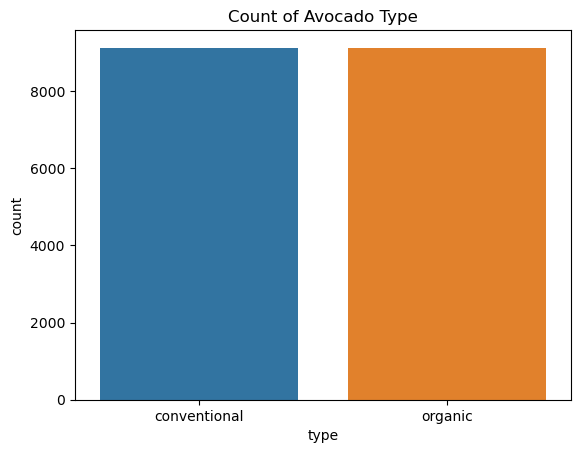

In [327]:
sns.countplot(x='type',data=avocado)
plt.title('Count of Avocado Type')
plt.show

In [328]:
avocado['type'].value_counts()

type
conventional    9126
organic         9123
Name: count, dtype: int64

The conventional type has 9126 counts and organic has 9123 counts

array([[<Axes: title={'center': 'AveragePrice'}>,
        <Axes: title={'center': 'Total Volume'}>,
        <Axes: title={'center': '4046'}>],
       [<Axes: title={'center': '4225'}>,
        <Axes: title={'center': '4770'}>,
        <Axes: title={'center': 'Total Bags'}>],
       [<Axes: title={'center': 'Small Bags'}>,
        <Axes: title={'center': 'Large Bags'}>,
        <Axes: title={'center': 'XLarge Bags'}>],
       [<Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'Month'}>,
        <Axes: title={'center': 'Day'}>],
       [<Axes: >, <Axes: >, <Axes: >]], dtype=object)

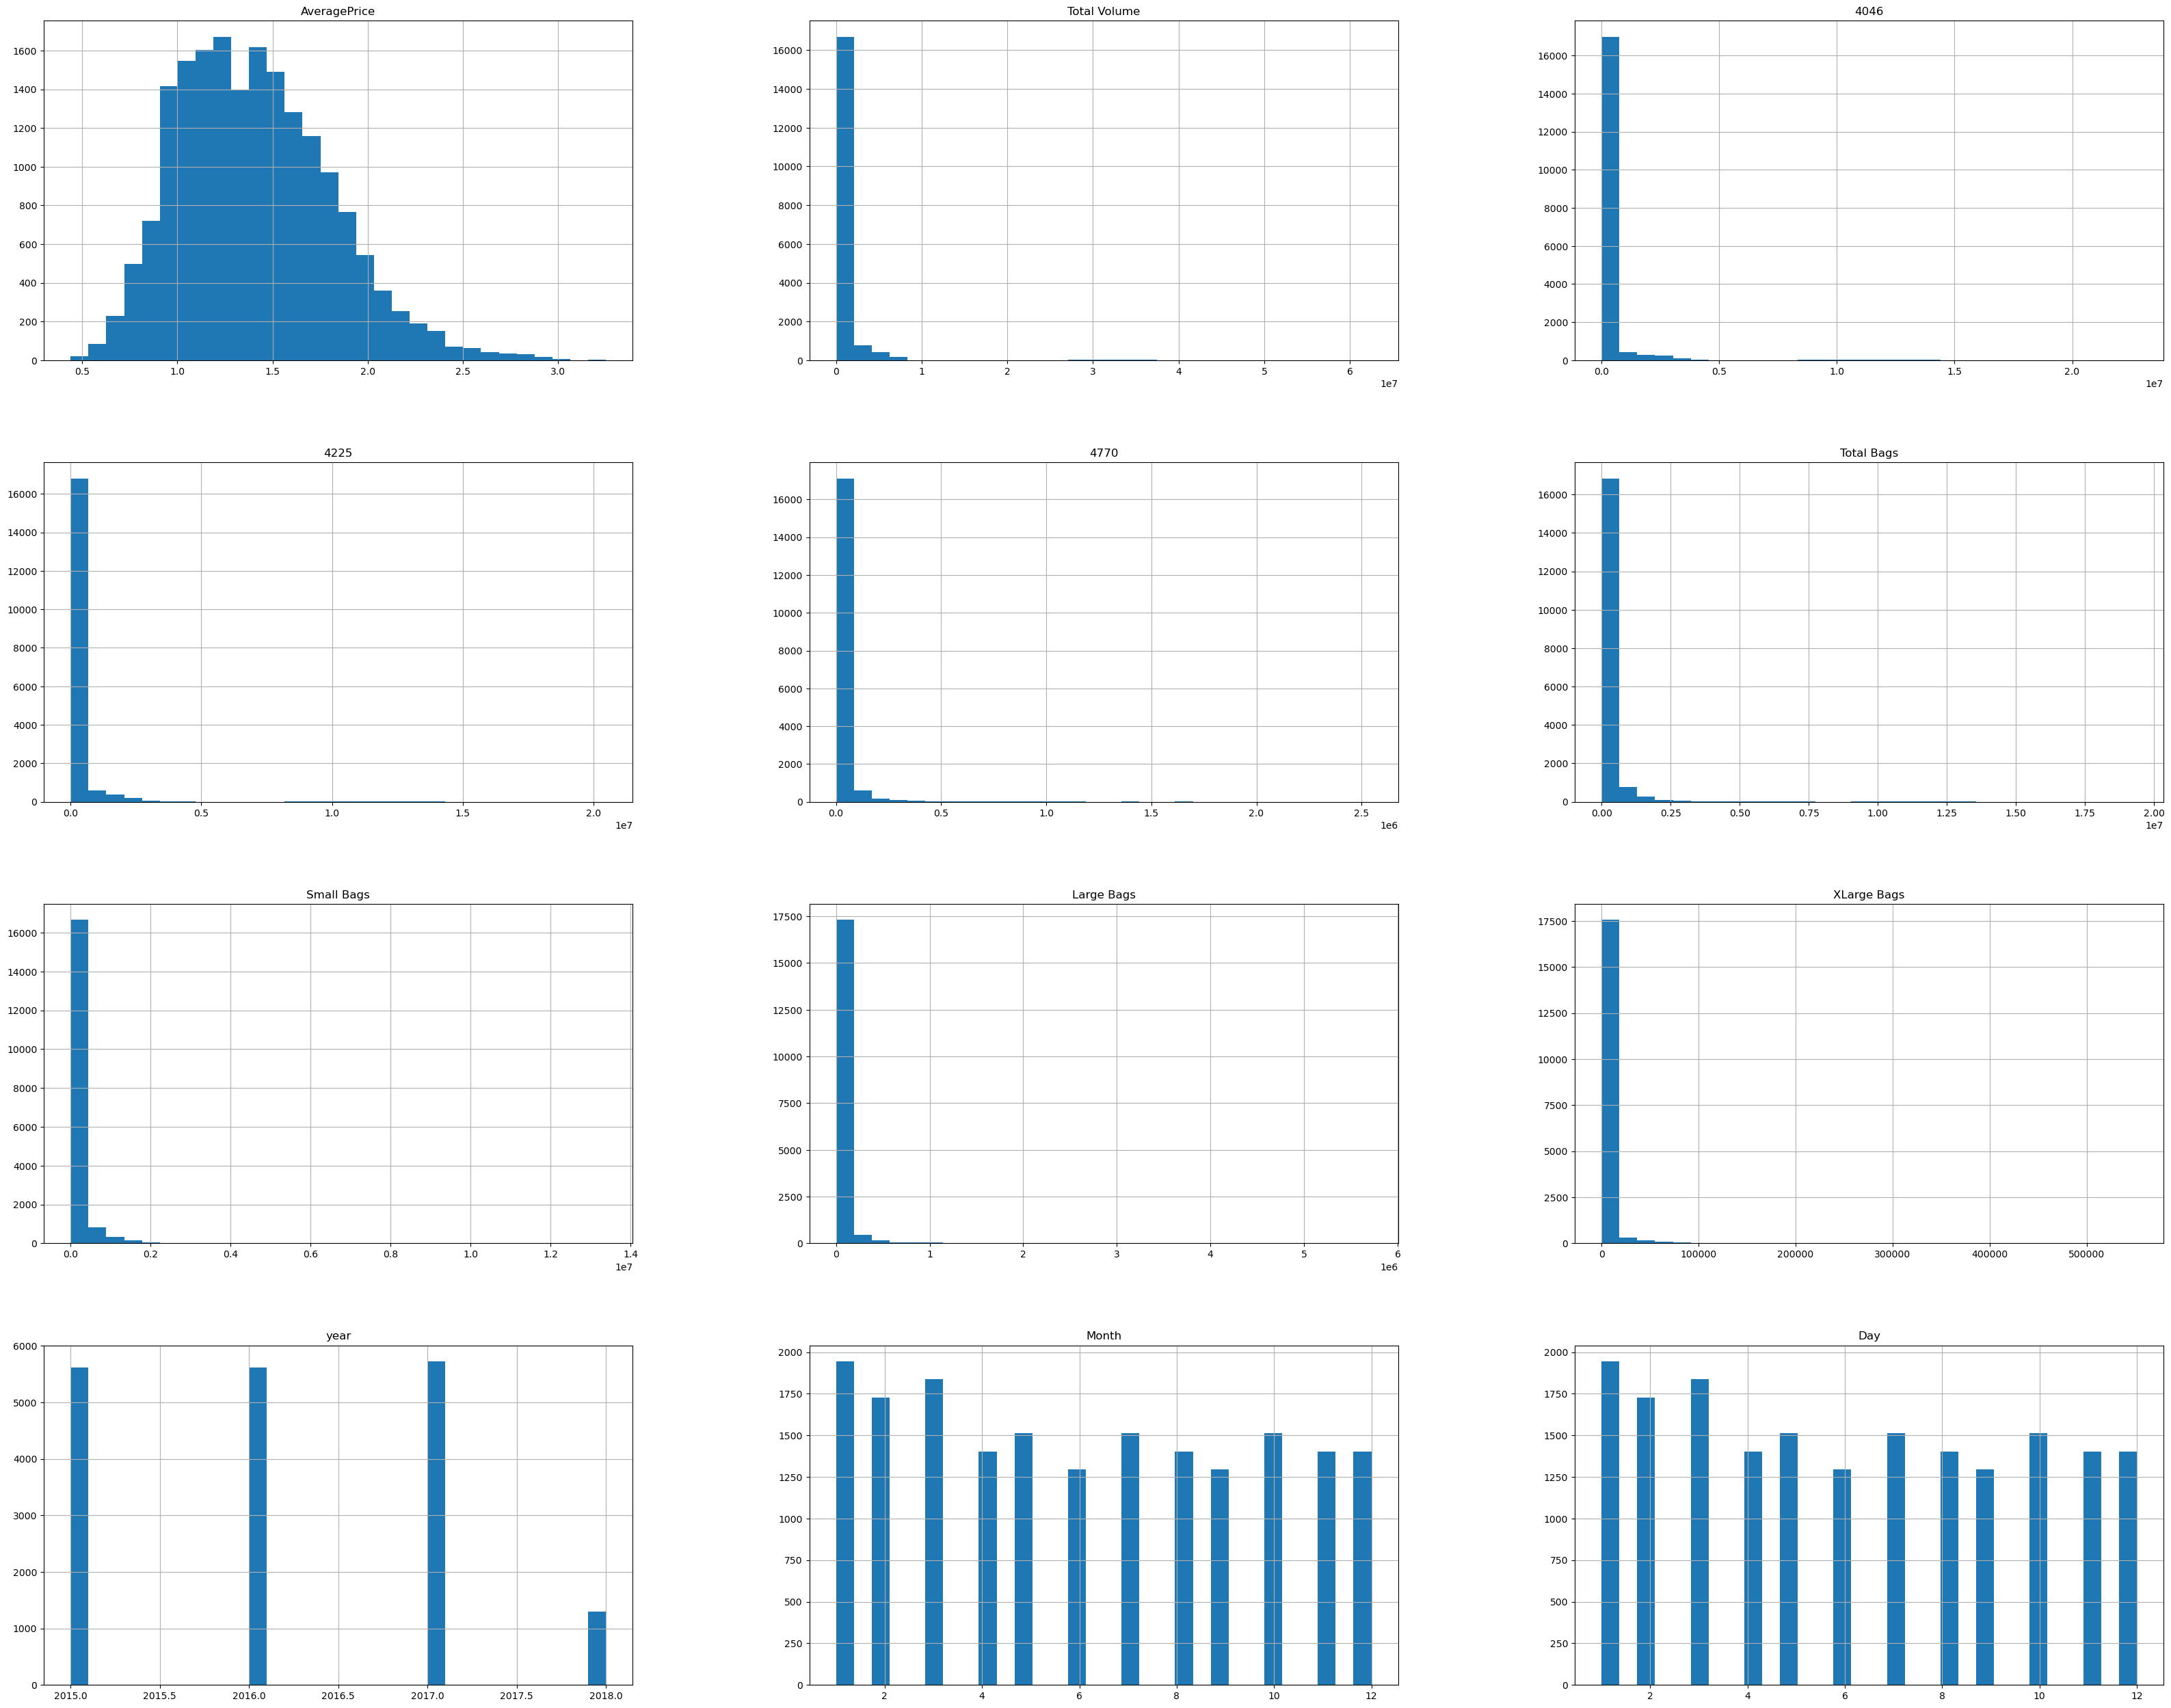

In [329]:
avocado.hist(figsize=(40,40),grid=True,bins=30,layout=(5,3))

Observations:
1.Most of the columns like (Total volume,Total bags, Large bags , XLarge bags are right skewed data) where mean >median and some of the columns (small bags,4046  etc re left skewed data) where mean < median. Hence skewness has to be removed.

2.The year 2017 has the maximun avocado count.

3.Month 'January' has the highest count. 

4.Day 1 has the highest count.


#### BiVariate Analysis

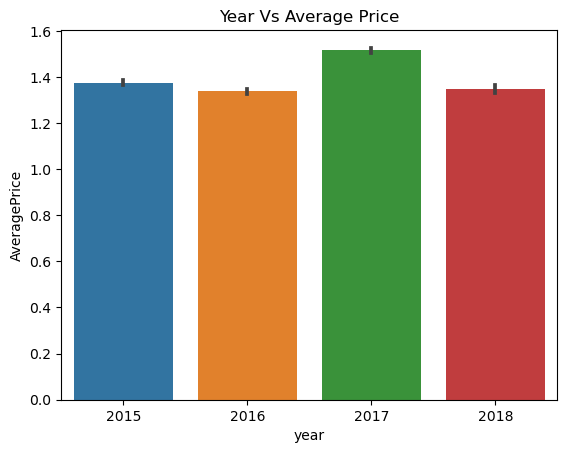

In [330]:
import seaborn as sns
sns.barplot(x='year',y='AveragePrice',data=avocado)
plt.title("Year Vs Average Price")
plt.show()

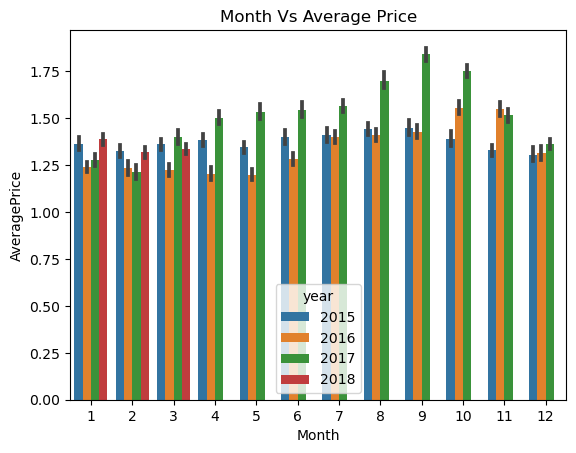

In [331]:
import seaborn as sns
sns.barplot(x='Month',y='AveragePrice',hue='year',data=avocado)
plt.title("Month Vs Average Price")
plt.show()

In the year 2017, September and october(9,10) month has the highest average price. 

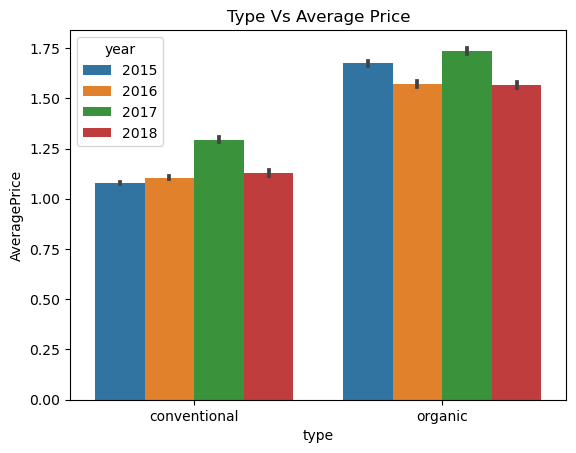

In [332]:
import seaborn as sns
sns.barplot(x='type',y='AveragePrice',hue='year',data=avocado)
plt.title("Type Vs Average Price")
plt.show()

In 2017, the type organic has highest count when compared to conventional.

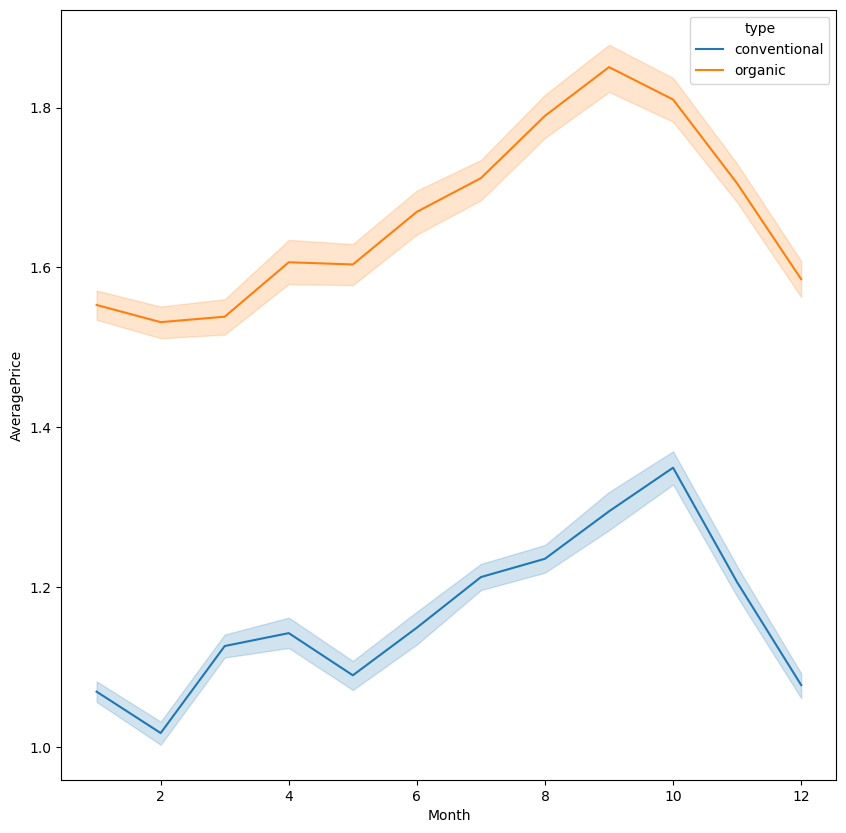

In [333]:
plt.figure(figsize=(10,10))
sns.lineplot(x='Month',y='AveragePrice',hue='type',data=avocado)
plt.show()

In the year 2017, September and october(9,10) month has the highest average price. 

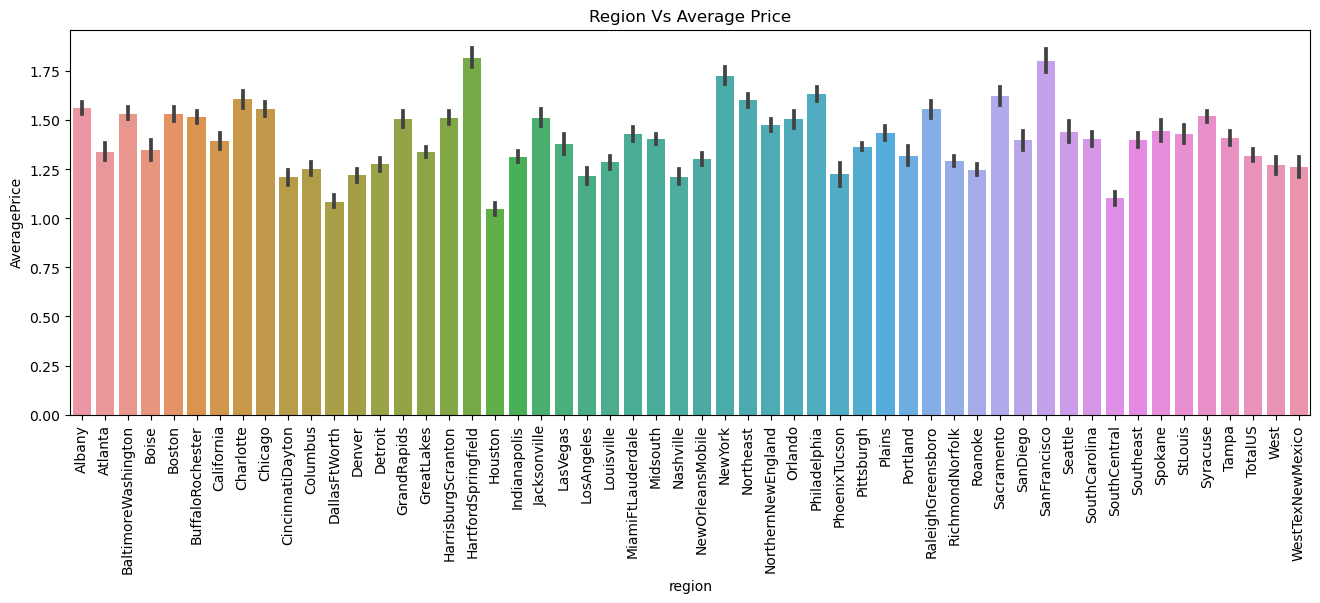

In [334]:
plt.figure(figsize=(16,5))
sns.barplot(x='region', y='AveragePrice',data=avocado)
plt.xticks(rotation=90)
plt.title('Region Vs Average Price')
plt.show()

The regions 'HartfordSpringfield  and SanFrancisco' has highest Average price.

In [335]:
region_avgPrice=avocado.groupby('region')['AveragePrice'].mean()
region_avgPrice

region
Albany                 1.561036
Atlanta                1.337959
BaltimoreWashington    1.534231
Boise                  1.348136
Boston                 1.530888
BuffaloRochester       1.516834
California             1.395325
Charlotte              1.606036
Chicago                1.556775
CincinnatiDayton       1.209201
Columbus               1.252781
DallasFtWorth          1.085592
Denver                 1.218580
Detroit                1.276095
GrandRapids            1.505000
GreatLakes             1.338550
HarrisburgScranton     1.513284
HartfordSpringfield    1.818639
Houston                1.047929
Indianapolis           1.313994
Jacksonville           1.510947
LasVegas               1.380917
LosAngeles             1.216006
Louisville             1.286686
MiamiFtLauderdale      1.428491
Midsouth               1.404763
Nashville              1.212101
NewOrleansMobile       1.304793
NewYork                1.727574
Northeast              1.601923
NorthernNewEngland     1.477396
O

SanFrancisco has highest mean value 1.804201 and HartfordSpringfield has highest mean value 1.818639

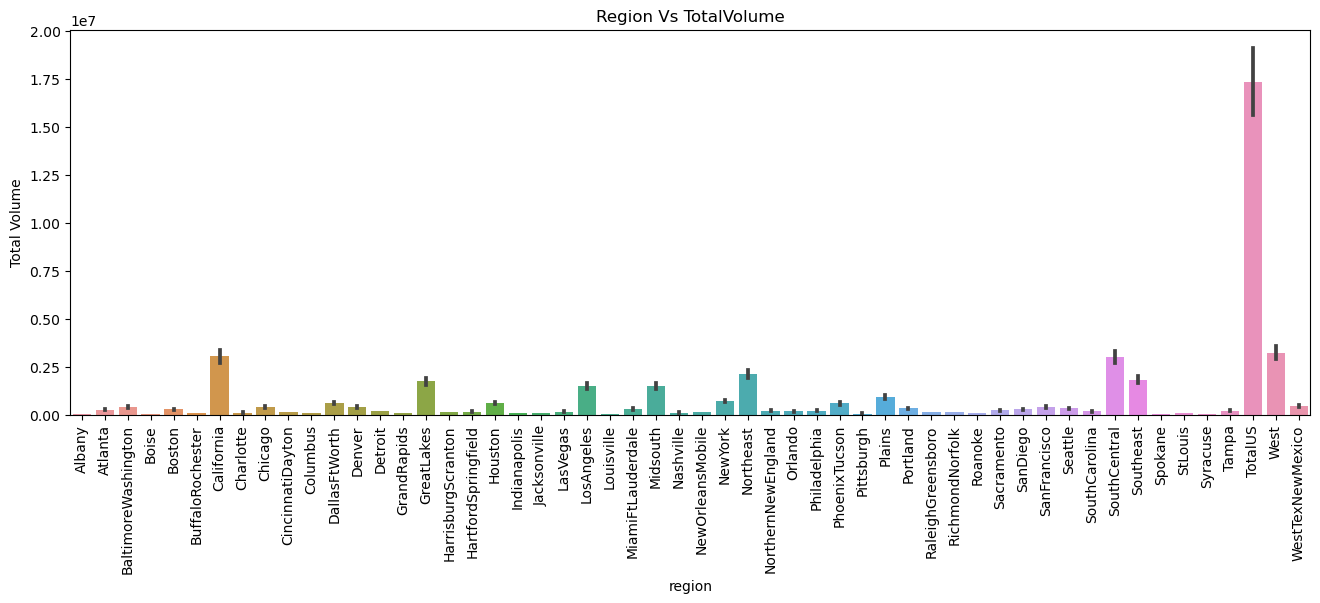

In [336]:
plt.figure(figsize=(16,5))
sns.barplot(x='region', y='Total Volume',data=avocado)
plt.xticks(rotation=90)
plt.title('Region Vs TotalVolume')
plt.show()

In [337]:
region_avgPrice=avocado.groupby('region')['Total Volume'].sum().sort_values(ascending=False).reset_index()
region_avgPrice

,region,Total Volume
0,TotalUS,5.864740e+09
1,West,1.086779e+09
2,California,1.028982e+09
3,SouthCentral,1.011280e+09
4,Northeast,7.132809e+08
5,Southeast,6.152384e+08
6,GreatLakes,5.896425e+08
7,Midsouth,5.083494e+08
8,LosAngeles,5.078965e+08
9,Plains,3.111885e+08


TotalUS has the highest volume.

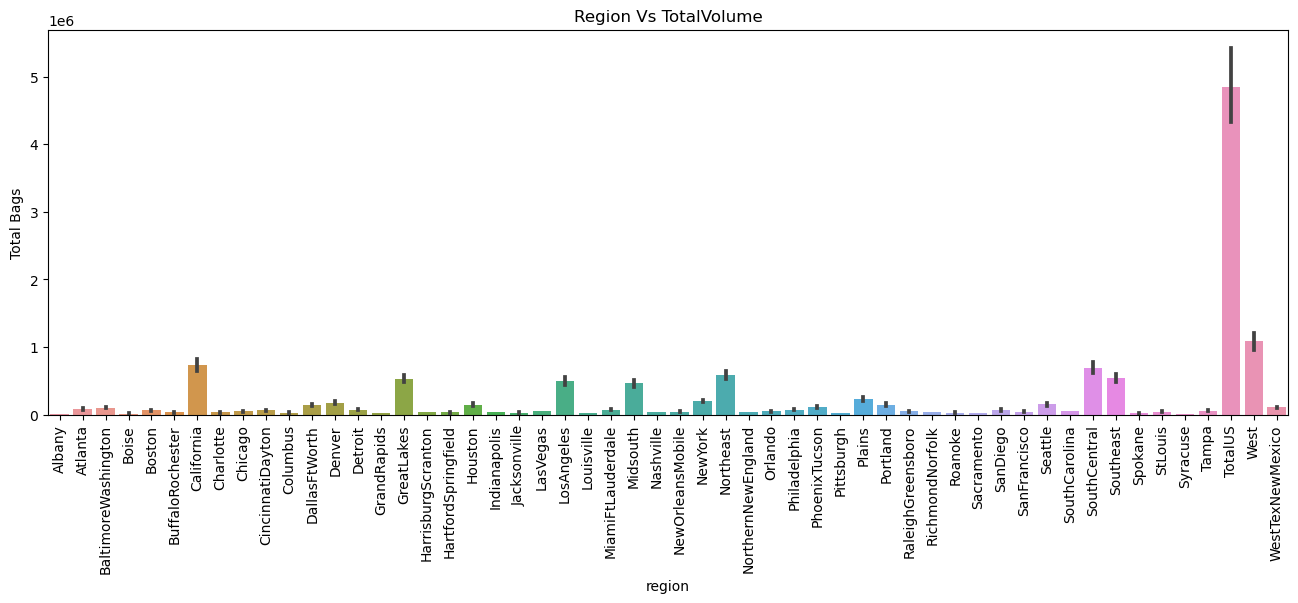

In [338]:
plt.figure(figsize=(16,5))
sns.barplot(x='region', y='Total Bags',data=avocado)
plt.xticks(rotation=90)
plt.title('Region Vs TotalVolume')
plt.show()

In [339]:
region_totalbags=avocado.groupby('region')['Total Bags'].sum().sort_values(ascending=False).reset_index()
region_totalbags

,region,Total Bags
0,TotalUS,1.638601e+09
1,West,3.670736e+08
2,California,2.466822e+08
3,SouthCentral,2.333924e+08
4,Northeast,1.969884e+08
5,Southeast,1.815276e+08
6,GreatLakes,1.785756e+08
7,LosAngeles,1.682645e+08
8,Midsouth,1.565136e+08
9,Plains,7.784720e+07


The avocado volume and avocado total bags are high in region "TotalUS"

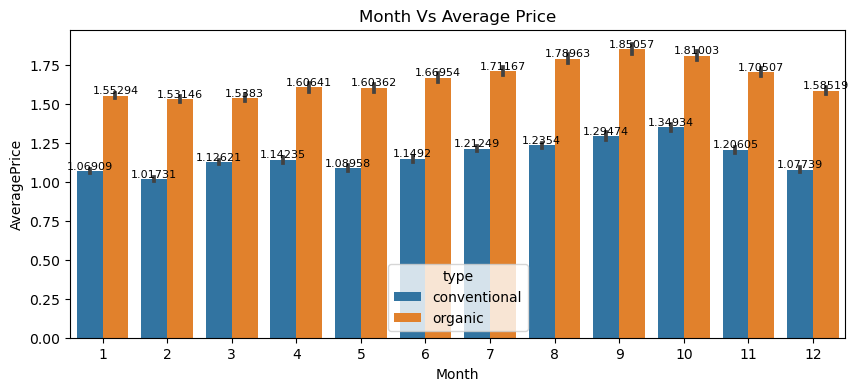

In [340]:
plt.figure(figsize=(10,4))
ax=sns.barplot(x="Month", y="AveragePrice", hue='type', data=avocado)
for container in ax.containers:
    ax.bar_label(container, fontsize=8)
plt.title('Month Vs Average Price')
plt.show()

In [341]:
avocado.groupby(['Month','type'])['AveragePrice'].mean().reset_index()

,Month,type,AveragePrice
0,1,conventional,1.069095
1,1,organic,1.552942
2,2,conventional,1.017315
3,2,organic,1.531458
4,3,conventional,1.126209
5,3,organic,1.538301
6,4,conventional,1.142350
7,4,organic,1.606410
8,5,conventional,1.089577
9,5,organic,1.603624


#### Converting Categorical data into Numericl Data(Data PreProcessing)

In [342]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
avocado['type']=le.fit_transform(avocado['type'])
avocado['region']=le.fit_transform(avocado['region'])

In [343]:
avocado.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0,12,12
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0,12,12
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0,12,12
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0,12,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0,11,11


In [344]:
avocadoCorr=avocado.corr()
avocadoCorr

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.615845,0.093197,-0.011716,0.162409,0.162409
Total Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,-0.232434,0.017193,0.174176,-0.024689,-0.024689
4046,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,-0.225819,0.003353,0.192073,-0.025803,-0.025803
4225,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.232289,-0.009559,0.145726,-0.022108,-0.022108
4770,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.210027,-0.036531,0.095252,-0.033424,-0.033424
Total Bags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,-0.217788,0.071552,0.175256,-0.022724,-0.022724
Small Bags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,-0.220535,0.063915,0.164702,-0.023126,-0.023126
Large Bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,-0.193177,0.087891,0.198768,-0.020187,-0.020187
XLarge Bags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,-0.175483,0.081033,0.082281,-0.012969,-0.012969
type,0.615845,-0.232434,-0.225819,-0.232289,-0.210027,-0.217788,-0.220535,-0.193177,-0.175483,1.000000,-0.000032,-0.000280,-0.000085,-0.000085


<Axes: >

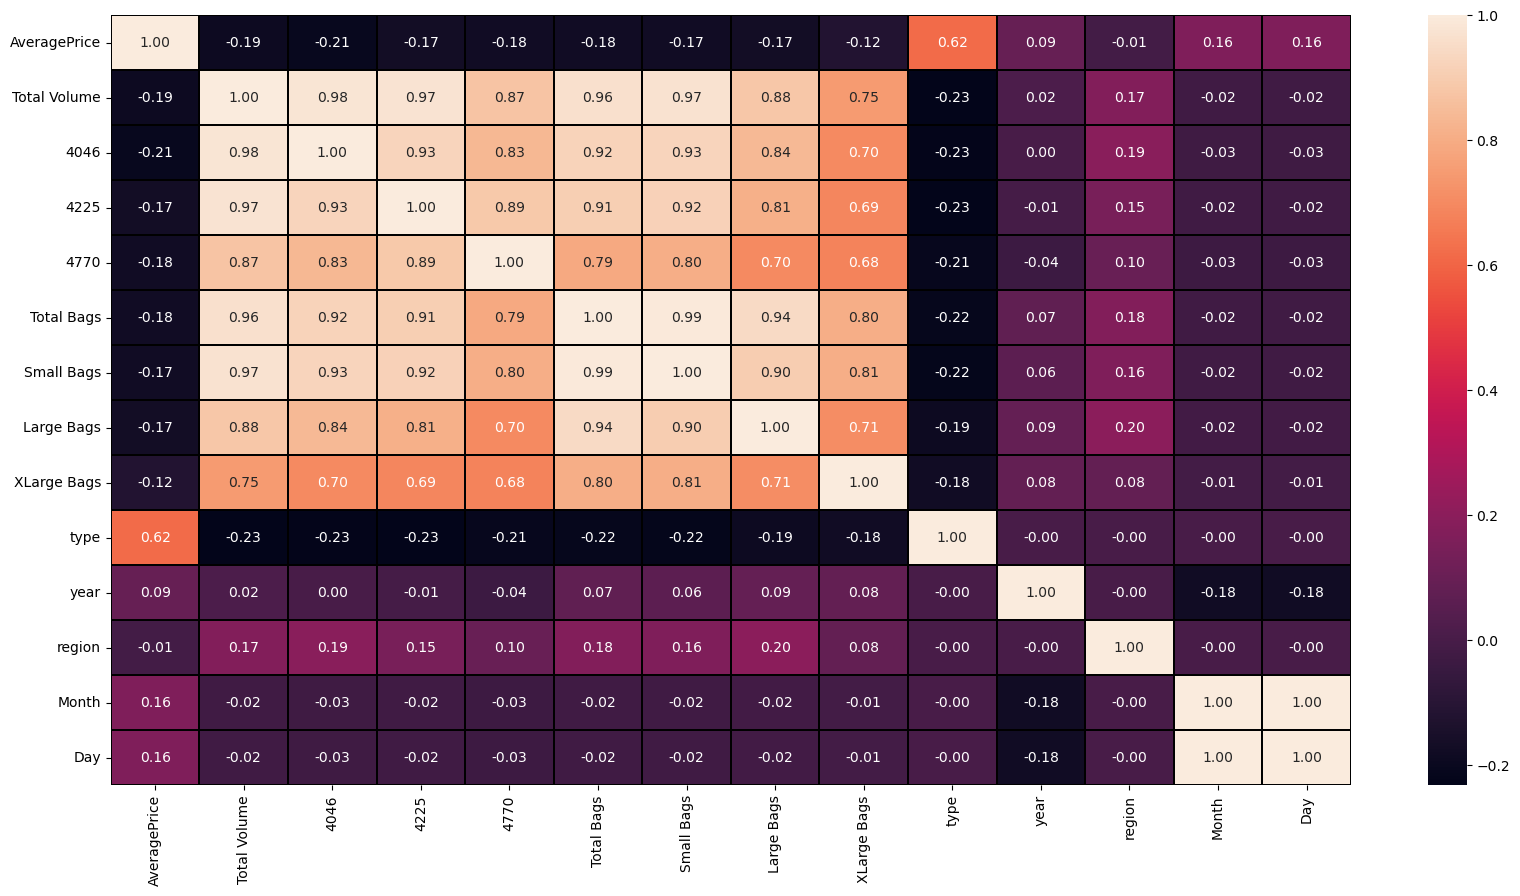

In [345]:
plt.figure(figsize=(20,10))
sns.heatmap(avocado.corr(),annot=True,linewidth=0.1,linecolor='black',fmt='0.2f')

Type column have high co relation with the target column(average price) viceversa.

Some of them are negatively correlated with data are highly correlated with each other

  - columns
        - 4046 - Total number of avocados with PLU 4046 sold
        - 4225 - Total number of avocados with PLU 4225 sold
        - 4770 - Total number of avocados with PLU 4770 sold
        - Total Volume - Total number of avacados sold
        
       

AveragePrice       Axes(0.125,0.653529;0.133621x0.226471)
Total Volume    Axes(0.285345,0.653529;0.133621x0.226471)
4046             Axes(0.44569,0.653529;0.133621x0.226471)
4225            Axes(0.606034,0.653529;0.133621x0.226471)
4770            Axes(0.766379,0.653529;0.133621x0.226471)
Total Bags         Axes(0.125,0.381765;0.133621x0.226471)
Small Bags      Axes(0.285345,0.381765;0.133621x0.226471)
Large Bags       Axes(0.44569,0.381765;0.133621x0.226471)
XLarge Bags     Axes(0.606034,0.381765;0.133621x0.226471)
type            Axes(0.766379,0.381765;0.133621x0.226471)
year                   Axes(0.125,0.11;0.133621x0.226471)
region              Axes(0.285345,0.11;0.133621x0.226471)
Month                Axes(0.44569,0.11;0.133621x0.226471)
Day                 Axes(0.606034,0.11;0.133621x0.226471)
dtype: object

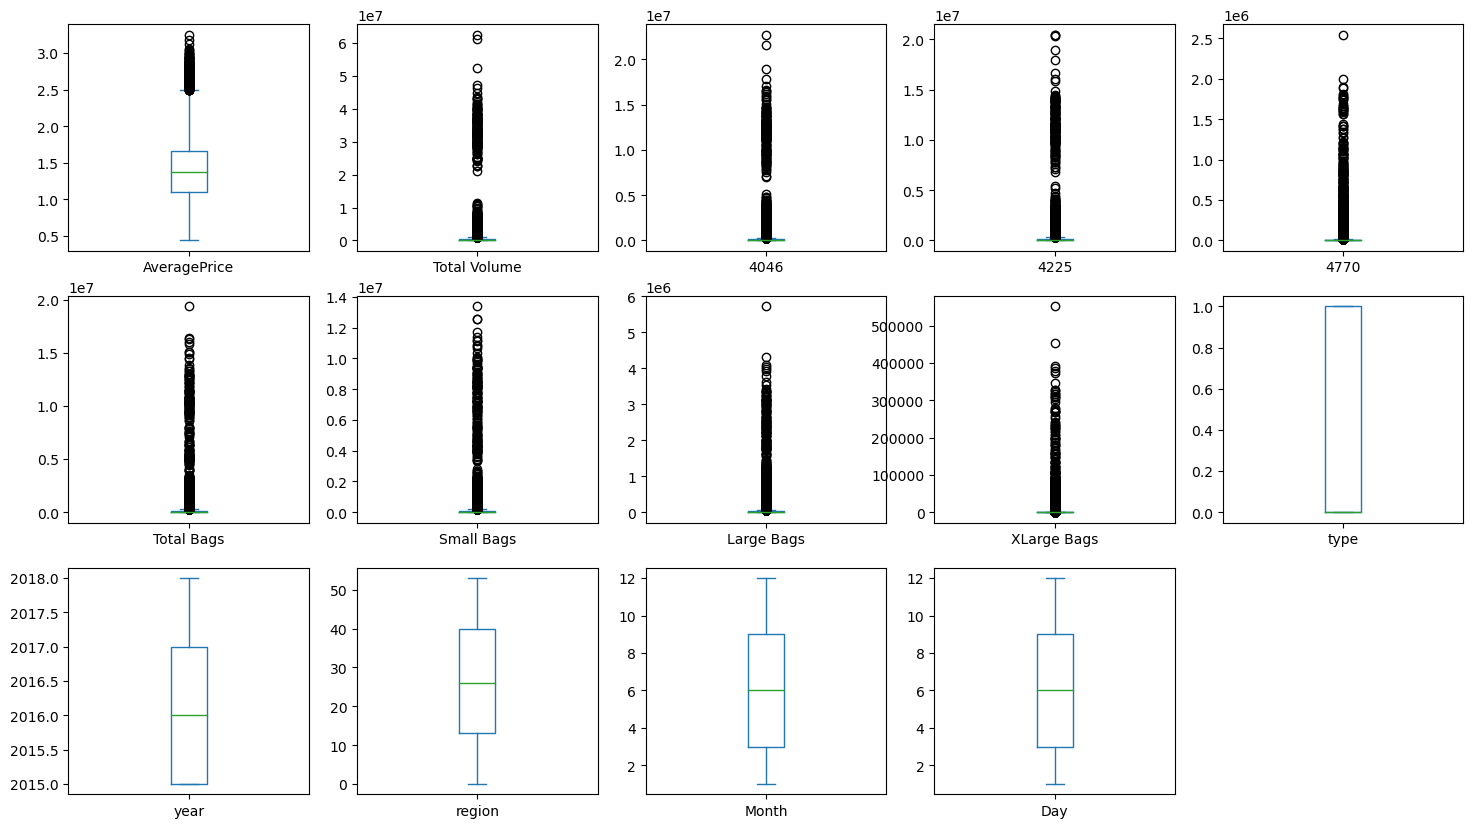

In [346]:
avocado.plot(kind='box',subplots=True,layout=(3,5),figsize=(18,10))

Outliers are present in the column average price,Total volume,4046,4225,4770,Total bags,Small Bags,Large Bags,XLarge Bags.

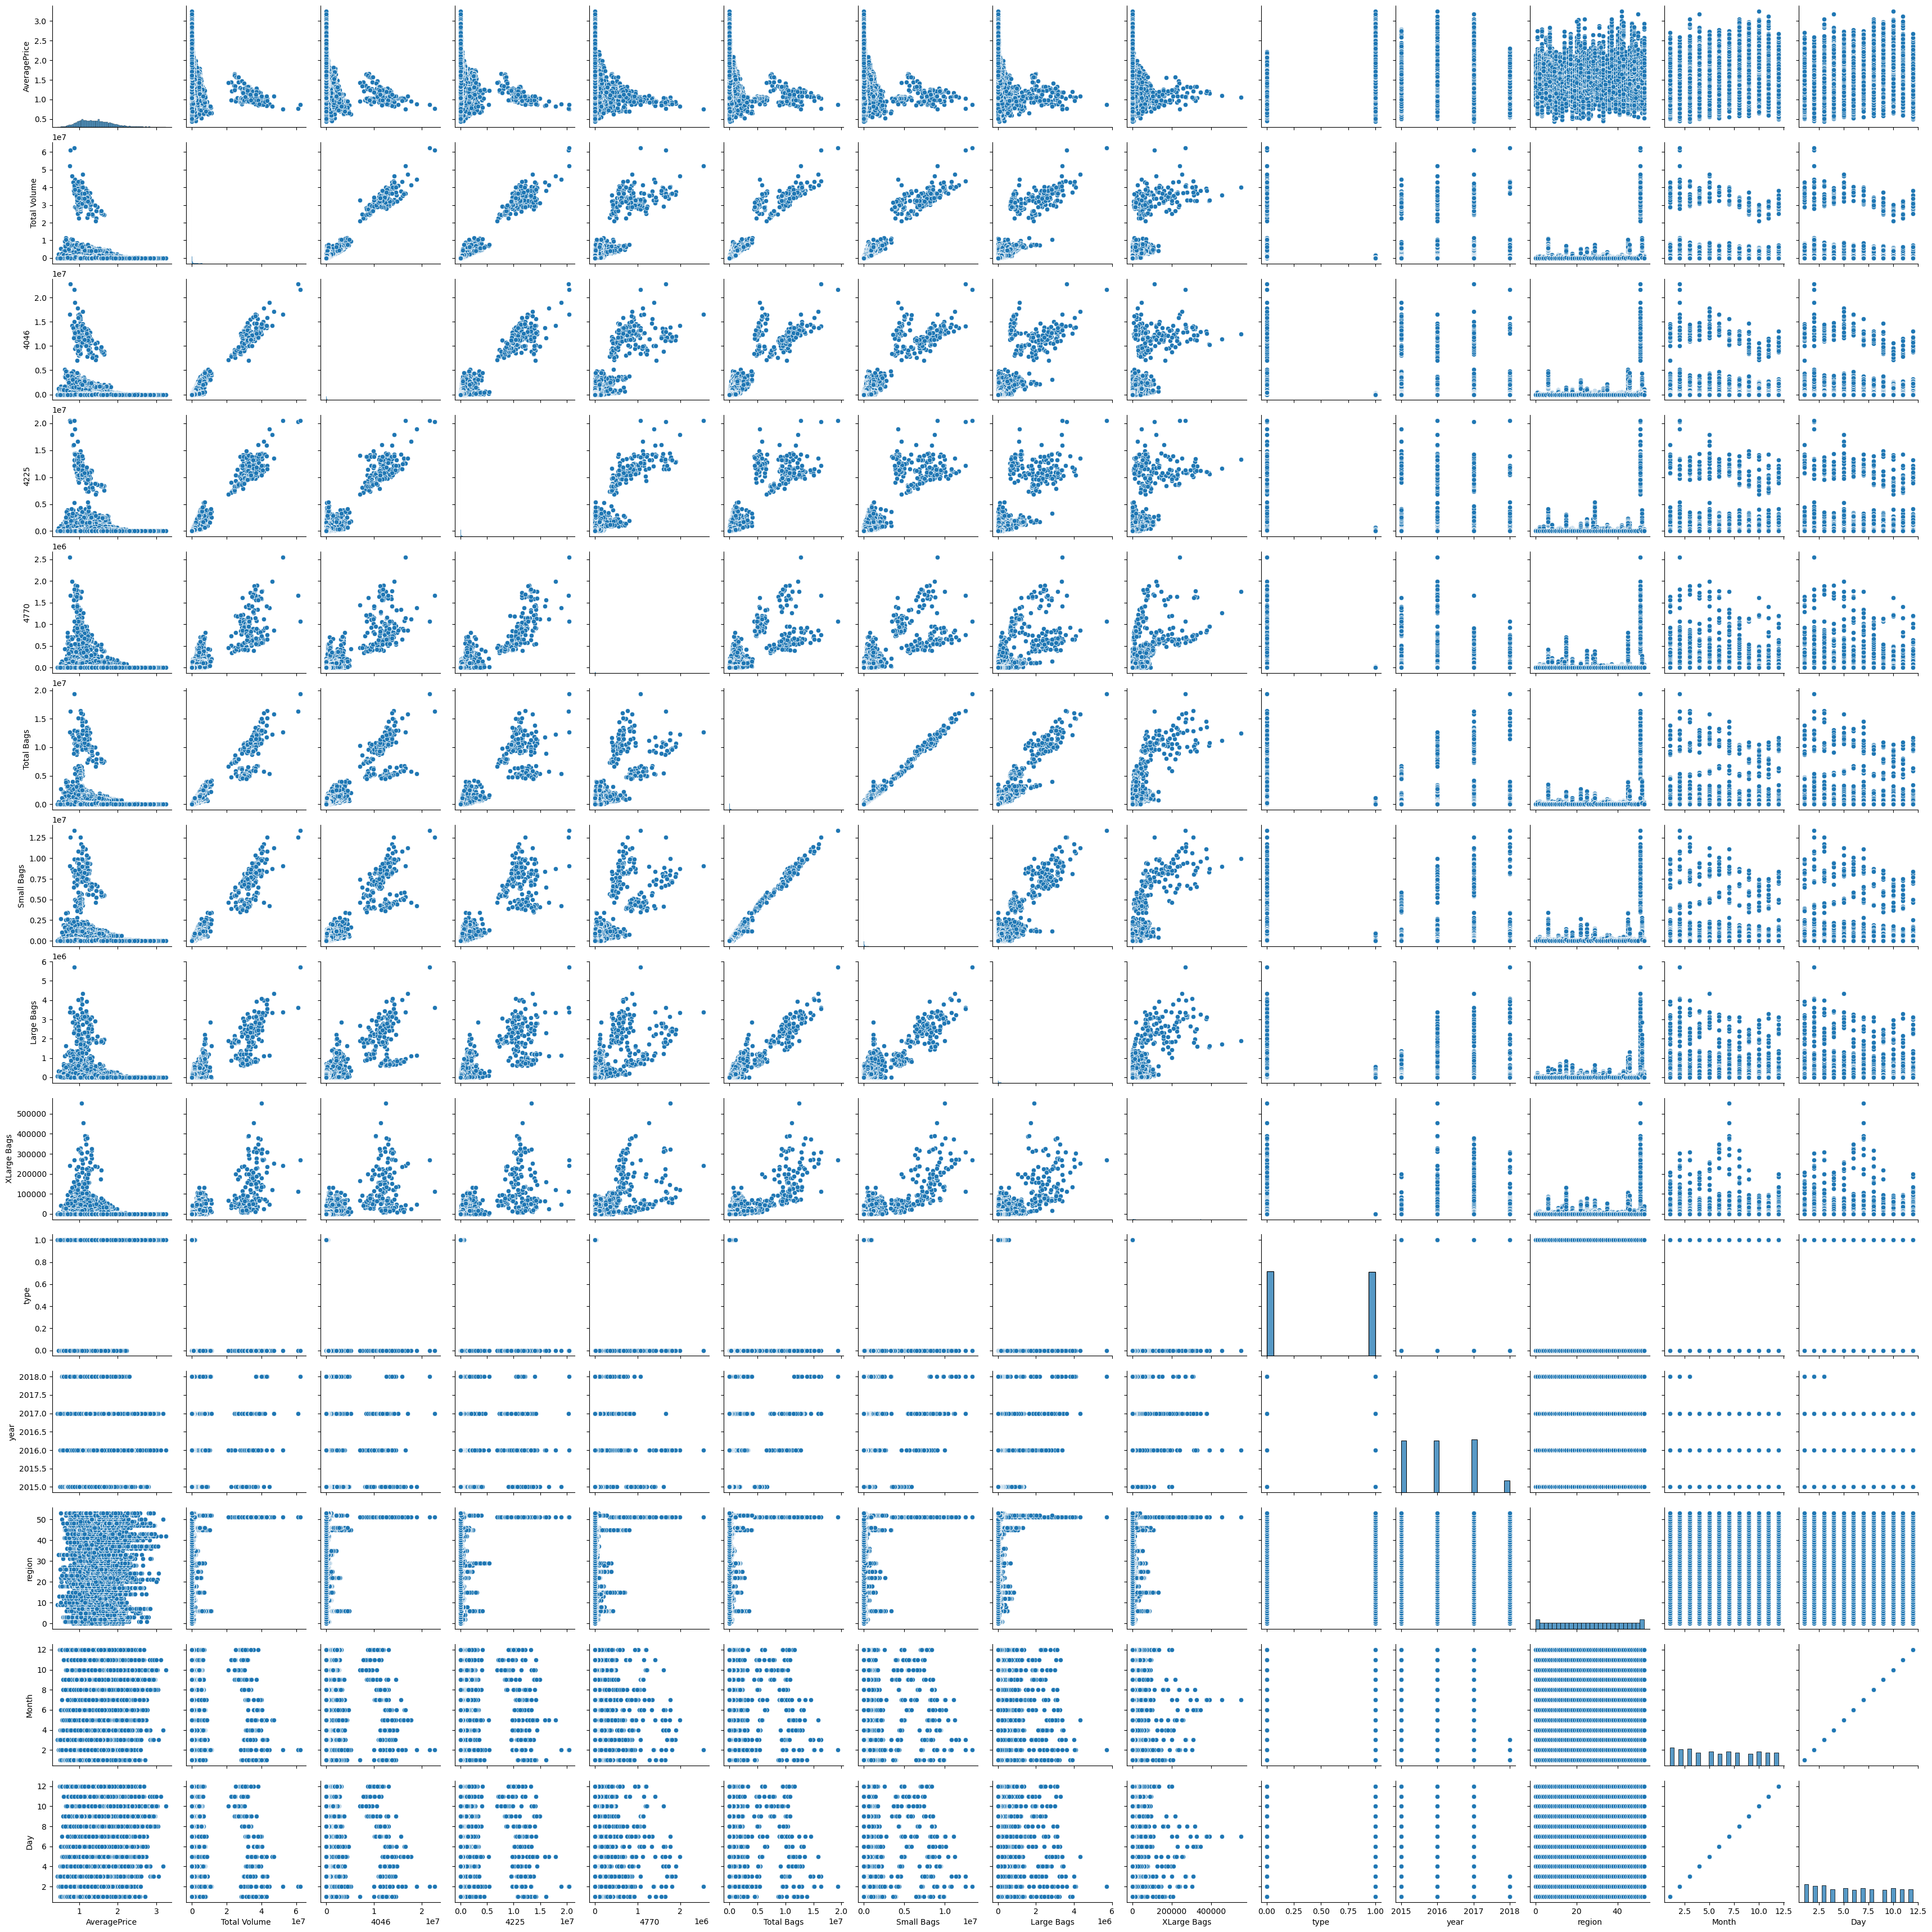

In [347]:
sns.pairplot(avocado)
plt.show()

#### Removing Outliers

In [348]:
from scipy.stats import zscore
z = np.abs(zscore(avocado))
threshold = 3
avocado_new = avocado[(z<3).all(axis = 1)]
avocado_new.shape

(17651, 14)

Variance Inflation Factor

In [349]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= pd.DataFrame()
vif['VIF']= [variance_inflation_factor(avocado.values,i) for i in range(avocado.shape[1])]
vif['Features']= avocado.columns
vif

,VIF,Features
0,2.288679e+01,AveragePrice
1,5.213172e+09,Total Volume
2,6.947984e+08,4046
3,6.333882e+08,4225
4,4.974087e+06,4770
5,2.502000e+14,Total Bags
6,1.429714e+14,Small Bags
7,1.521486e+13,Large Bags
8,7.856943e+10,XLarge Bags
9,3.399608e+00,type


### Skewness

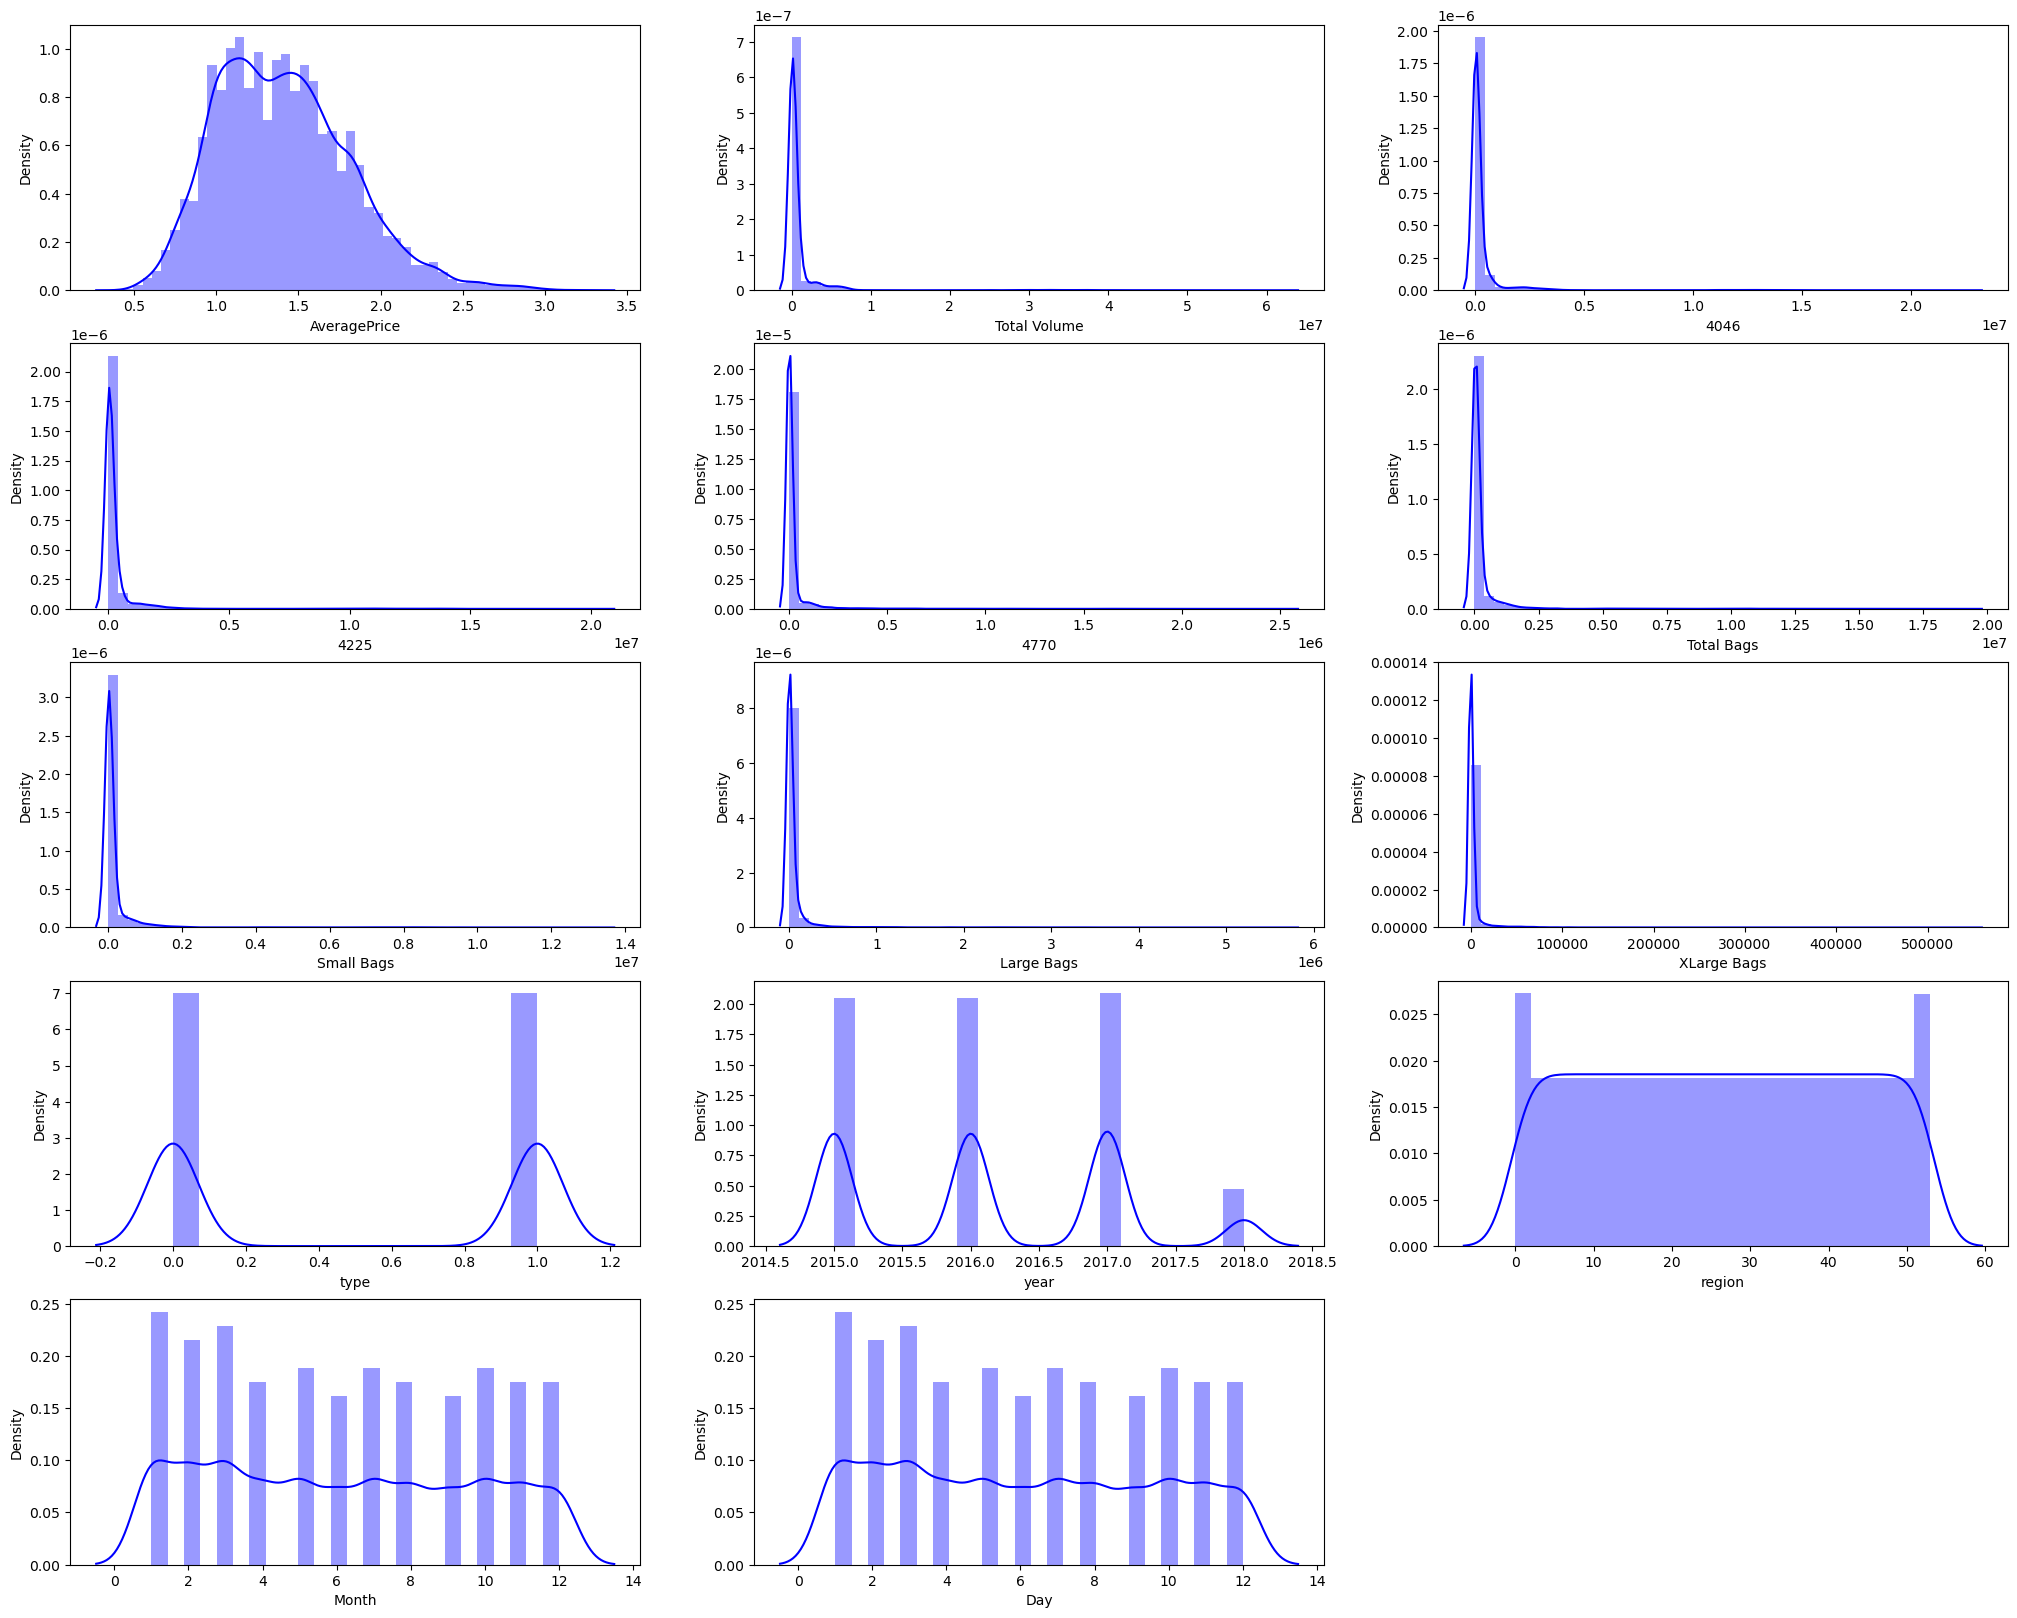

In [350]:
plt.figure(figsize=(25,20))
for i in enumerate(avocado.columns):
    plt.subplot(5,3,i[0]+1)
    sns.distplot(avocado[i[1]],color='b')

In [351]:

avocado.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
type             0.000329
year             0.215339
region           0.000030
Month            0.106617
Day              0.106617
dtype: float64

Most of the columns are skewed. We need to remove the skewed data >0.5

In [352]:
from sklearn.preprocessing import power_transform

avocado[['Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags']]=power_transform(avocado[['Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags']],method='yeo-johnson')

In [353]:
avocado.skew()

AveragePrice    0.580303
Total Volume    0.011171
4046           -0.022679
4225           -0.017740
4770            0.032184
Total Bags     -0.001626
Small Bags      0.007058
Large Bags     -0.073809
XLarge Bags     0.793520
type            0.000329
year            0.215339
region          0.000030
Month           0.106617
Day             0.106617
dtype: float64

Now we could see skewness removed 

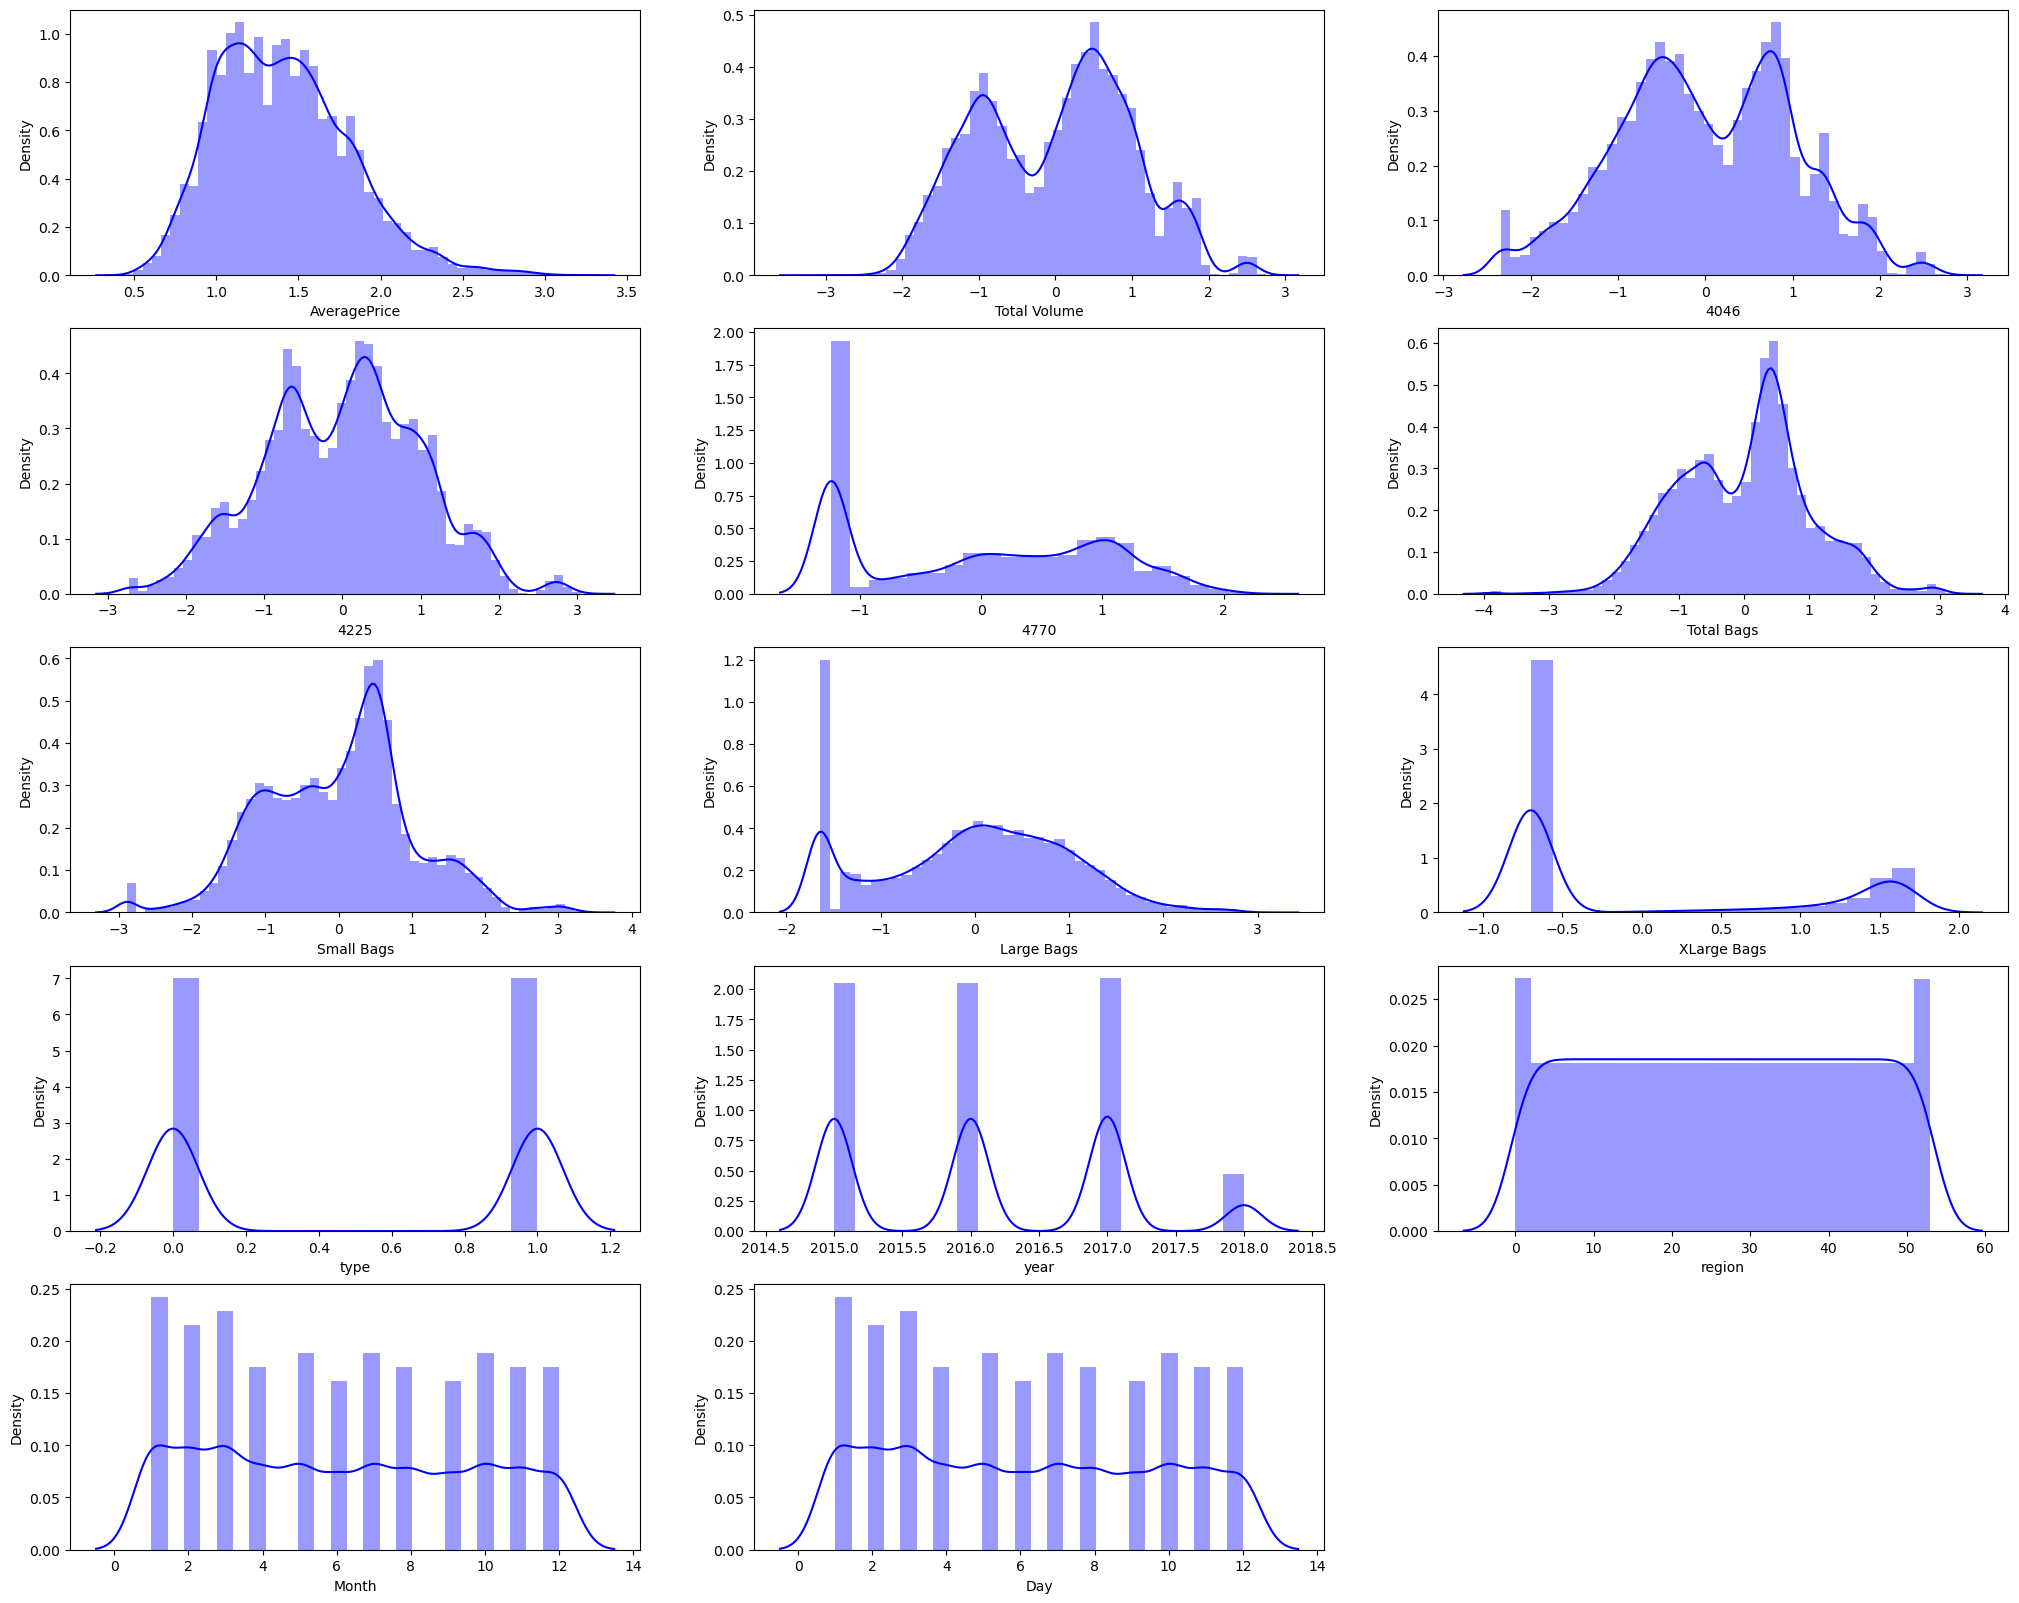

In [354]:
plt.figure(figsize=(25,20))
for i in enumerate(avocado.columns):
    plt.subplot(5,3,i[0]+1)
    sns.distplot(avocado[i[1]],color='b')

#### Prediction of Price 

#### Data Splitting

In [355]:
x = avocado.drop(['AveragePrice'],axis=1)
y = avocado['AveragePrice']

#### Scaling X values

In [356]:
from sklearn.preprocessing import MinMaxScaler

sc=MinMaxScaler()
x=sc.fit_transform(x)

Model Prediction

In [357]:
model=[LinearRegression(),DecisionTreeRegressor(),KNeighborsRegressor(),AdaBoostRegressor(),BaggingRegressor(),RandomForestRegressor(),
       GradientBoostingRegressor(),Ridge(),Lasso()]
max_r2_score=0
for i_state in range(10,20):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i_state,test_size=0.33)
    for i in model:
        i.fit(x_train,y_train)
        pred=i.predict(x_test)
        r2_score1=r2_score(y_test,pred)
        #print('r2_score for random_state',i_state,'is',r2_score1)
        if r2_score1>max_r2_score:
            max_r2_score=r2_score1
            Final_state=i_state
            Final_model=i
print('R2_score is ',max_r2_score,'for random state ',Final_state, 'and model is ',Final_model)

R2_score is  0.8883772374959813 for random state  14 and model is  RandomForestRegressor()


RandomForestAgressor has the best R2score 0.888 for Random state 11 and hence we are traing with that score

In [358]:
rfc=RandomForestRegressor()
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=11,test_size=0.33)
rfc.fit(x_train,y_train)
rfc.score(x_train,y_train)
pred_y=rfc.predict(x_test)
rfc=r2_score(y_test,pred_y)
print('r2_score =',rfc*100)

r2_score = 88.49835114585699


RandomForestRegressor R2 score is 88.3 and it has best R2 score when compared to all models

#### HYPERPARAMETER TUNING 

RandomizedSearchCV 

In [359]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=11,test_size=0.33)
random_grid = {'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]}
rfc = RandomForestRegressor()
rfc_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=11, n_jobs = -1)

rfc_random.fit(x_train, y_train)
best_params = rfc_random.best_params_
best_rfc = RandomForestRegressor(**best_params)

Fitting 3 folds for each of 32 candidates, totalling 96 fits


In [360]:

best_rfc.fit(x,y)
pred_y1=best_rfc.predict(x_test)
rfc1=r2_score(y_test,pred_y1)
print('Evalating best R2_score for Random Forest Regressor ',rfc1*100)

Evalating best R2_score for Random Forest Regressor  98.60772861569043


In [361]:

print('mean_absolute_error is',mean_absolute_error(y_test,pred_y1))
print('mean_squared_error',mean_squared_error(y_test,pred_y1))
print('root mean absolute error',np.sqrt(mean_absolute_error(y_test,pred_y1)))

mean_absolute_error is 0.032410183063471834
mean_squared_error 0.002238728493216501
root mean absolute error 0.1800282840652319


In [362]:
pred_y1

array([1.90665524, 2.00798333, 1.88610925, ..., 1.65577466, 1.23612879,
       1.28461481])

Text(0, 0.5, 'pred_y1')

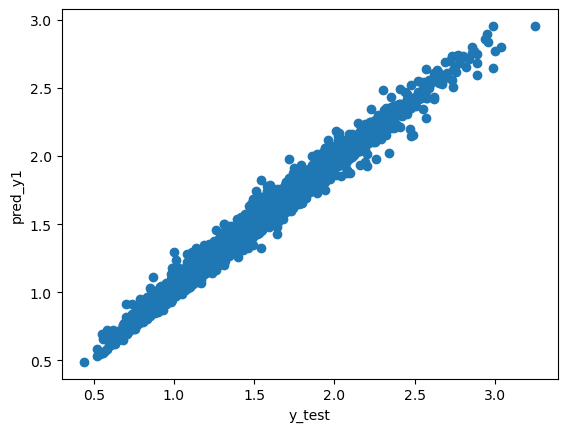

In [363]:
plt.scatter(x=y_test,y=pred_y1)
plt.xlabel('y_test')
plt.ylabel('pred_y1')

Saving the Model

In [364]:
import pickle
filename = 'Avocado_AveragePrice_best_model.pkl'
pickle.dump(best_rfc, open(filename, 'wb'))

#### Predicting Avocado by Region

In [365]:
x1 = avocado.drop("region",axis=1)
y1 = avocado["region"]

#### Scaling

In [366]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x1 = pd.DataFrame(sc.fit_transform(x1), columns=x1.columns)

#### Data Splitting

In [367]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.25,random_state=42)

#### Model Training

In [368]:
Lg=LogisticRegression()
dtc=DecisionTreeClassifier(criterion='entropy')
gnb=GaussianNB()
ada = AdaBoostClassifier()
rfc = RandomForestClassifier(n_estimators=100,random_state=42)
gb = GradientBoostingClassifier()
knn=KNeighborsClassifier()
etc=ExtraTreesClassifier()

model=(Lg,dtc,gnb,ada,rfc,gb,knn,etc)
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predict=m.predict(x_test)
    print('Accuracy Score of',m,)
    print(accuracy_score(y_test,predict))
    print(confusion_matrix(y_test,predict))
    print(classification_report(y_test,predict))

Accuracy Score of LogisticRegression()
0.5439403900942362
[[48  0  0 ...  0  0  0]
 [ 0 30  0 ...  0  0  0]
 [ 0  0 48 ...  0  0  2]
 ...
 [ 0  0  0 ... 77  0  0]
 [ 0  0  0 ...  1 70  0]
 [ 0  0  3 ...  0  0 21]]
              precision    recall  f1-score   support

           0       0.55      0.63      0.59        76
           1       0.23      0.35      0.28        85
           2       0.58      0.60      0.59        80
           3       0.61      0.38      0.46        88
           4       0.45      0.43      0.44        83
           5       0.70      0.50      0.58        94
           6       0.86      0.91      0.89        82
           7       0.55      0.55      0.55        94
           8       0.74      0.81      0.78        90
           9       0.55      0.75      0.63        88
          10       0.52      0.48      0.50        79
          11       0.61      0.64      0.62        85
          12       0.54      0.52      0.53        83
          13       0.25      

HyperParameter Tuning-RandomizedSearchCV

In [369]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 20],
    'min_samples_leaf': [1, 4],
    'max_features': ['auto', 'sqrt']
}


random_search_rfc = RandomizedSearchCV(estimator=RandomForestClassifier(), param_distributions=param_grid, cv=5, n_jobs=-1)


random_search_rfc.fit(x_train, y_train)


best_params = random_search_rfc.best_params_
best_model = random_search_rfc.best_estimator_

y_pred = best_model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score of RandomForestClassifier:", accuracy*100)

Accuracy Score of RandomForestClassifier: 91.47490685952224


#### The RandomForestClassifier with accuracy Score "91.4" works best after Tuning.

Saving the best Model

In [370]:
import pickle
filename = 'Avocado_Region_best_model.pkl'
pickle.dump(best_model, open(filename, 'wb'))

In [371]:
y_pred=rfc.predict(x_test)
data2=pd.DataFrame({"Actual":y_test,'Predicted':y_pred})
data2

,Actual,Predicted
8604,10,10
2608,50,31
14581,50,24
4254,27,27
16588,34,34
...,...,...
3763,18,18
79,1,1
13798,35,35
4506,32,32
